# Project 1: Linear Regression

In [1]:
import os
import numpy as np
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

## Linear regression of one variable

We're going to implement linear regression for one variable to try to predict the profits of a food truck. Suppose you are the CEO of a food truck franchise and you are considering different cities to open a new branch. The franchise already has other trucks in several cities and you have the profitability data for each of them, as well as the population of each of these municipalities. You plan to use this data to choose which city to open the next truck.

The document `data/data1.txt` contains a dataset for our regression problem. The first column is the population of the city (in 10,000 inhabitants) and the second column is the profit of the food truck in this city (in 10,000 dollars). A negative value for profit means a loss.

In [2]:
# Read comma separated data
data = np.loadtxt(os.path.join("data/", "p1data1.txt"), delimiter=",")
X, y = data[:, 0], data[:, 1]
m = y.size  # Number of training examples

### Plotting the data

Before starting any task, it is interesting to visualize the data. For this dataset, we can use a scatter plot to visualize the data, since we only have one feature (population).

In [3]:
def plotData(X, y):
    """
    Plots the data points x and y into a new figure. Plots the data
    points and gives the figure axes labels of population and profit.

    Parameters
    ----------
    X : array_like
        Data point values for x-axis.

    y : array_like
        Data point values for y-axis. Note X and y should have the same size.
    """
    fig = pyplot.figure()
    pyplot.plot(X, y, "ro", ms=10, mec="k")
    pyplot.ylabel("Profit in $10,000")
    pyplot.xlabel("Population of City in 10,000s")

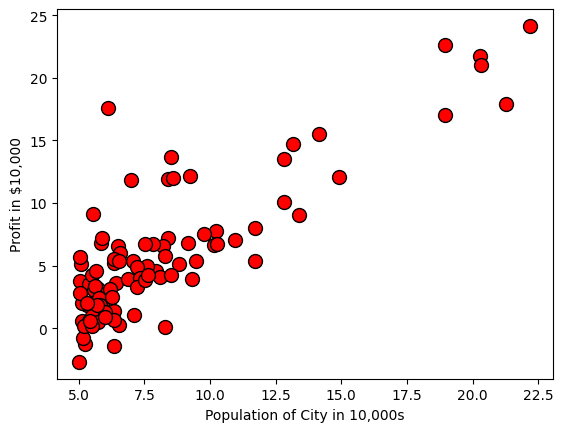

In [4]:
plotData(X, y)

### Gradient Descent

In this part, we will adjust the $\theta$ parameters of the linear regression of our dataset using the technique called *gradient descent*.

All the variables used in the equations for this project follow the same pattern used in sections 1 and 2 of Source 1 of the course “[Machine Learning](https://www.coursera.org/learn/machine-learning)”, available on the Coursera platform.

#### Updating the equations

The aim of linear regression is to minimize the cost function

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left( h_{\theta}(x^{(i)}) - y^{(i)}\right)^2$$

where the hypothesis $h_\theta(x)$ is given by the linear model

$$ h_\theta(x) = \theta^Tx = \theta_0 + \theta_1 x_1$$

Note that the parameters of our model are the values of $\theta_j$. These values must be adjusted to minimize the cost function $J(\theta)$. One way of doing this is to use the *gradient descent* method on *batches* of data. In this technique, each iteration performs an update

$$ \theta_j = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)}\right)x_j^{(i)} \qquad \text{ simultaneous update of } \theta_j \text{ for all } j$$

With each iteration of the method, the parameter $\theta_j$ approaches the optimal values, i.e. those at which the cost function $J(\theta)$ will be minimized.

*Implementation note: We store each example in a row of the $X$ matrix. To take into account the intercept term ($\theta_0$), we will add an “extra” first column to $X$, in which all elements will be equal to '1'. This will allow us to treat $\theta_0$ as another simple feature.*


#### Implementation

We already have the data for the linear regression. In the next cell, we will add another dimension to our data to accommodate the intercept term $\theta_0$. Do NOT run this cell more than once.

In [5]:
# Add a column of ones to X. The numpy function stack joins arrays along a given axis.
# The first axis (axis=0) refers to rows (training examples)
# and second axis (axis=1) refers to columns (features).
X = np.stack([np.ones(m), X], axis=1)

#### Calculating the cost $J(\theta)$

When we use the *gradient descent* method to minimize the cost function $J(\theta)$, it is interesting to monitor its convergence, i.e. the value of the cost over the iterations. In this section, we will implement the function that calculates $J(\theta)$, allowing us to monitor the convergence of our implementation.

In [6]:
def computeCost(X, y, theta):
    """
    Compute cost for linear regression. Computes the cost of using theta as the
    parameter for linear regression to fit the data points in X and y.

    Parameters
    ----------
    X : array_like
        The input dataset of shape (m x n+1), where m is the number of examples,
        and n is the number of features. We assume a vector of one's already
        appended to the features so we have n+1 columns.

    y : array_like
        The values of the function at each data point. This is a vector of
        shape (m, ).

    theta : array_like
        The parameters for the regression function. This is a vector of
        shape (n+1, ).

    Returns
    -------
    J : float
        The value of the regression cost function.
    """
    m = y.size  # Number of training examples
    J = 0
    hypothesis = np.dot(X, theta)
    squared_errors = (hypothesis - y) ** 2
    J = (1 / (2 * m)) * np.sum(squared_errors)
    return J

Once the function is complete, the next step is to run `computeCost` twice using two different initializations of $\theta$.

In [7]:
J = computeCost(X, y, theta=np.array([0.0, 0.0]))
print("With theta = [0, 0] \nCalculated cost = %.2f" % J)
print("Expected cost value (approximate) 32.07\n")

# Further testing of the cost function
J = computeCost(X, y, theta=np.array([-1, 2]))
print("With theta = [-1, 2]\nCalculated cost = %.2f" % J)
print("Expected cost value (approximate) 54.24")

With theta = [0, 0] 
Calculated cost = 32.07
Expected cost value (approximate) 32.07

With theta = [-1, 2]
Calculated cost = 54.24
Expected cost value (approximate) 54.24


#### Gradient Descent

Next, we will implement the function that describes the gradient descent.

In [8]:
def gradientDescent(X, y, theta, alpha, num_iters):
    """
    Performs gradient descent to learn `theta`. Updates theta by taking `num_iters`
    gradient steps with learning rate `alpha`.

    Parameters
    ----------
    X : array_like
        The input dataset of shape (m x n+1).

    y : array_like
        Value at given features. A vector of shape (m, ).

    theta : array_like
        Initial values for the linear regression parameters.
        A vector of shape (n+1, ).

    alpha : float
        The learning rate.

    num_iters : int
        The number of iterations for gradient descent.

    Returns
    -------
    theta : array_like
        The learned linear regression parameters. A vector of shape (n+1, ).

    J_history : list
        A python list for the values of the cost function after each iteration.
    """
    m = y.shape[0]  # Number of training examples
    dim = theta.shape[0]  # Number of parameters
    # Make a copy of theta to avoid changing the original array
    theta = theta.copy()
    J_history = []
    for i in range(num_iters):
        hypothesis = np.dot(X, theta)
        error = hypothesis - y
        gradient = (1 / m) * np.dot(X.T, error)
        theta -= alpha * gradient
        J_history.append(computeCost(X, y, theta))
    return theta, J_history

Now we'll call the implemented function `gradientDescent` and print out the calculated $\theta$. We will initialize the parameters $\theta$ to 0 and the learning rate $\alpha$ to 0.01. Run the next cell to check the code.

In [9]:
# Initialize fitting parameters
theta = np.zeros(2)
# Gradient descent settings
iterations = 1500
alpha = 0.01

theta, J_history = gradientDescent(X, y, theta, alpha, iterations)
print("Theta found with gradient descent: {:.4f}, {:.4f}".format(*theta))
print("Expected theta values (approximate): [-3.6303, 1.1664]")

Theta found with gradient descent: -3.6303, 1.1664
Expected theta values (approximate): [-3.6303, 1.1664]


We will use the parameters obtained as output from the `gradientDescent` function to plot the linear regression.

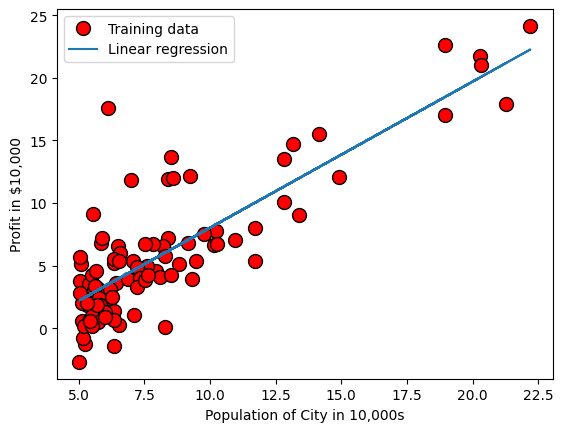

In [10]:
# Plot the linear fit
plotData(X[:, 1], y)
pyplot.plot(X[:, 1], np.dot(X, theta), "-")
pyplot.legend(["Training data", "Linear regression"])

Our final $\theta$ figures will also be used to forecast profits in areas of 35 and 70 thousand inhabitants.

In [11]:
# Predict values for population sizes of 35,000 and 70,000
predict1 = np.dot([1, 3.5], theta)
print(
    "For population = 35,000, we forecast a profit of {:.2f}\n".format(
        predict1 * 10000
    )
)

predict2 = np.dot([1, 7], theta)
print(
    "For population = 70,000, we forecast a profit of {:.2f}\n".format(
        predict2 * 10000
    )
)

For population = 35,000, we forecast a profit of 4519.77

For population = 70,000, we forecast a profit of 45342.45



### Visualizing $J(\theta)$

To better understand the cost function $J(\theta)$, we will now plot the cost on a three-dimensional graph, with the cost on the z-axis as a function of $\theta_0$ and $\theta_1$. The purpose of these graphs is to show how $J(\theta)$ varies with changes in $\theta_0$ and $\theta_1$. The cost function $J(\theta)$ has a global minimum. This is easier to visualize in the contour plot than in the 3-D plot. This minimum is the optimum point for $\theta_0$ and $\theta_1$, and each iteration of the *gradient descent* method moves the parameters closer to this point.

Text(0.5, 1.0, 'Contour, showing the point of minimum')

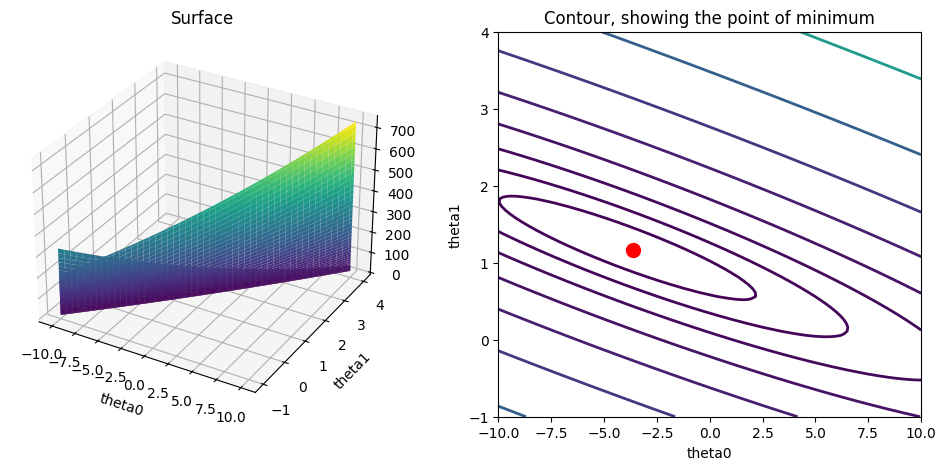

In [12]:
# grid over which we will calculate J
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

# initialize J_vals to a matrix of 0's
J_vals = np.zeros((theta0_vals.shape[0], theta1_vals.shape[0]))

# Fill out J_vals
for i, theta0 in enumerate(theta0_vals):
    for j, theta1 in enumerate(theta1_vals):
        J_vals[i, j] = computeCost(X, y, [theta0, theta1])

# Because of the way meshgrids work in the surf command, we need to
# transpose J_vals before calling surf, or else the axes will be flipped
J_vals = J_vals.T

# surface plot
fig = pyplot.figure(figsize=(12, 5))
ax = fig.add_subplot(121, projection="3d")
ax.plot_surface(theta0_vals, theta1_vals, J_vals, cmap="viridis")
pyplot.xlabel("theta0")
pyplot.ylabel("theta1")
pyplot.title("Surface")

# contour plot
# Plot J_vals as 15 contours spaced logarithmically between 0.01 and 100
ax = pyplot.subplot(122)
pyplot.contour(
    theta0_vals,
    theta1_vals,
    J_vals,
    linewidths=2,
    cmap="viridis",
    levels=np.logspace(-2, 3, 20),
)
pyplot.xlabel("theta0")
pyplot.ylabel("theta1")
pyplot.plot(theta[0], theta[1], "ro", ms=10, lw=2)
pyplot.title("Contour, showing the point of minimum")

Finally, it is interesting to observe the evolution of the cost function obtained throughout the iterations of the algorithm.

In [13]:
def plot_J_history(J_history):
    """
    Plot the evolution of the cost function over the iterations.

    Parameters
    ----------
    J_history : list
        list with J values.
    """
    fig = pyplot.figure()
    pyplot.ylabel("Computed cost (J)")
    pyplot.xlabel("Number of iterations")
    pyplot.plot(J_history)

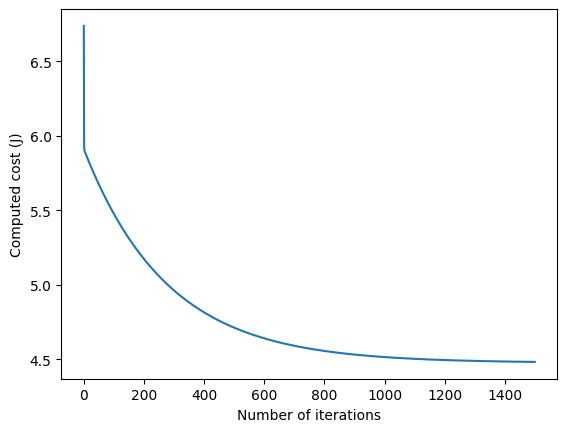

In [14]:
plot_J_history(J_history)

Notice how the cost function converges to smaller values than the initial ones, indicating the evolution of the regression fit over the iterations of the algorithm.